In [1]:
import keras
import numpy as np

from keras.layers import Conv3D, MaxPool3D, Flatten, Dense, Activation
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import mean_squared_error
from keras.losses import mse
from keras.optimizers import Adadelta
from keras.models import Model

Using TensorFlow backend.


In [2]:
## extra imports to set GPU options
import tensorflow as tf
from keras import backend as k
 
###################################
# TensorFlow wizardry
config = tf.ConfigProto()
 
# Don't pre-allocate memory; allocate as-needed
config.gpu_options.allow_growth = True
 
# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))
###################################

## seed
np.random.seed(1)
tf.set_random_seed(2)

In [3]:
X = np.load('IXI_cleaned_train/subject_brains.npy')
y = np.load('IXI_cleaned_train/subject_age.npy')

In [4]:
X.dtype
print(X.shape)
print(y.shape)

(500, 157, 206, 217)
(500,)


In [5]:
X = np.expand_dims(X, axis=-1) # 1 channel and normalize
X.shape

(500, 157, 206, 217, 1)

In [6]:
import matplotlib.pyplot as plt
plt.imshow(np.take(X[0,:,:,:,0], 100, 0))
plt.show()

<Figure size 640x480 with 1 Axes>

In [7]:
input_layer = Input(X.shape[1:])

conv_layer1 = Conv3D(filters=1, kernel_size=(3, 3, 3))(input_layer)
conv_layer1 = BatchNormalization()(conv_layer1)
conv_layer1 = Activation('relu')(conv_layer1)
pooling_layer1 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer1)

conv_layer2 = Conv3D(filters=1, kernel_size=(3, 3, 3))(pooling_layer1)
conv_layer2 = BatchNormalization()(conv_layer2)
conv_layer2 = Activation('relu')(conv_layer2)
pooling_layer2 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer2)

conv_layer3 = Conv3D(filters=16, kernel_size=(3, 3, 3))(pooling_layer2)
conv_layer3 = BatchNormalization()(conv_layer3)
conv_layer3 = Activation('relu')(conv_layer3)
pooling_layer3 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer3)

conv_layer4 = Conv3D(filters=32, kernel_size=(3, 3, 3))(pooling_layer3)
conv_layer4 = BatchNormalization()(conv_layer4)
conv_layer4 = Activation('relu')(conv_layer4)
pooling_layer4 = MaxPool3D(pool_size=(2, 2, 2))(conv_layer4)

flatten_layer = Flatten()(pooling_layer3)

dense_layer1 = Dense(units=1024, activation='relu')(flatten_layer)
dense_layer1 = Dropout(0.6)(dense_layer1)
dense_layer2 = Dense(units=256, activation='relu')(dense_layer1)
dense_layer2 = Dropout(0.6)(dense_layer2)
output_layer = Dense(units=1, activation='linear')(dense_layer2)

model = Model(inputs=input_layer, outputs=output_layer)

In [8]:
model.compile(loss=mse, optimizer=Adadelta(lr=0.01), metrics=['mae'])
history = model.fit(x=X, y=y, batch_size=5, epochs=200, validation_split=0.1)

Train on 450 samples, validate on 50 samples
Epoch 1/200
450/450 [==============================] - 43s 96ms/step - loss: 467.9439 - mean_absolute_error: 17.2104 - val_loss: 195.2079 - val_mean_absolute_error: 11.6481
Epoch 2/200
450/450 [==============================] - 29s 63ms/step - loss: 394.8162 - mean_absolute_error: 16.2754 - val_loss: 137.0254 - val_mean_absolute_error: 9.5952
Epoch 3/200
450/450 [==============================] - 29s 63ms/step - loss: 346.1054 - mean_absolute_error: 14.9329 - val_loss: 136.4910 - val_mean_absolute_error: 9.6667
Epoch 4/200
450/450 [==============================] - 29s 64ms/step - loss: 320.2385 - mean_absolute_error: 14.2991 - val_loss: 132.6066 - val_mean_absolute_error: 9.5642
Epoch 5/200
450/450 [==============================] - 29s 64ms/step - loss: 302.9000 - mean_absolute_error: 13.9006 - val_loss: 131.4577 - val_mean_absolute_error: 9.5622
Epoch 6/200
450/450 [==============================] - 29s 64ms/step - loss: 306.4605 - mean_a

Epoch 96/200
450/450 [==============================] - 27s 61ms/step - loss: 126.0309 - mean_absolute_error: 8.6644 - val_loss: 126.2730 - val_mean_absolute_error: 9.1705
Epoch 97/200
450/450 [==============================] - 27s 61ms/step - loss: 121.5033 - mean_absolute_error: 8.4314 - val_loss: 102.5115 - val_mean_absolute_error: 8.5611
Epoch 98/200
450/450 [==============================] - 27s 61ms/step - loss: 126.3692 - mean_absolute_error: 8.8489 - val_loss: 125.9876 - val_mean_absolute_error: 9.1373
Epoch 99/200
450/450 [==============================] - 27s 61ms/step - loss: 121.1746 - mean_absolute_error: 8.4335 - val_loss: 111.3886 - val_mean_absolute_error: 8.7448
Epoch 100/200
450/450 [==============================] - 27s 61ms/step - loss: 125.4993 - mean_absolute_error: 8.6269 - val_loss: 115.7311 - val_mean_absolute_error: 8.9754
Epoch 101/200
450/450 [==============================] - 27s 61ms/step - loss: 127.3686 - mean_absolute_error: 8.8821 - val_loss: 168.7134 

450/450 [==============================] - 28s 61ms/step - loss: 117.3724 - mean_absolute_error: 8.3032 - val_loss: 109.9711 - val_mean_absolute_error: 8.9332
Epoch 191/200
450/450 [==============================] - 28s 61ms/step - loss: 105.8538 - mean_absolute_error: 7.9853 - val_loss: 144.8848 - val_mean_absolute_error: 9.9151
Epoch 192/200
450/450 [==============================] - 28s 61ms/step - loss: 92.0485 - mean_absolute_error: 7.3023 - val_loss: 119.6595 - val_mean_absolute_error: 9.2108
Epoch 193/200
450/450 [==============================] - 28s 61ms/step - loss: 107.7130 - mean_absolute_error: 7.9128 - val_loss: 108.4973 - val_mean_absolute_error: 8.9090
Epoch 194/200
450/450 [==============================] - 28s 61ms/step - loss: 99.3885 - mean_absolute_error: 7.8825 - val_loss: 117.5525 - val_mean_absolute_error: 9.0662
Epoch 195/200
450/450 [==============================] - 27s 61ms/step - loss: 102.2757 - mean_absolute_error: 7.9968 - val_loss: 110.2779 - val_mean_a

In [9]:
y_pred = model.predict(X, batch_size=1)

In [10]:
print(np.mean(np.abs(y-y_pred)))
history.history.keys()

18.856604226653438


dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

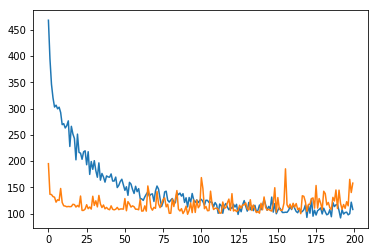

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

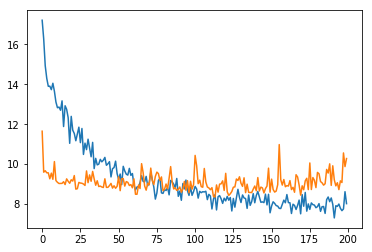

In [12]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])